# Carregar as bibliotecas

In [1]:
import numpy as np
from skimage import io, data, transform, color,util
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
def show(img_list, caption_list, Axis=False):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        ax[i].imshow(img_list[i], cmap='gray')
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

In [3]:
def mapping(img):
    nimg = util.img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

# Questão 1

<p>Testar as funções de transformação geométrica:
rotação, escala, translação, cisalhamento em imagens.

*   rotação: *transform.rotate(...)*
*   escala: *transform.rescale(...)*
*   traslação: *transform.AffineTransform(...)* e *transform.warp(..)*
*   cisalhamento: *transform.AffineTransform(...)* e *transform.warp(..)*

<ol>
  <li> <b>skimage.transform.rotate</b>(image, angle, resize=False, center=None, order=None, mode='constant', cval=0, clip=True, preserve_range=False):
  Rotate image by a certain angle around its center.
      
  Parameters
  <ul>
  <li> image: ndarray. Input image.</li>
  <li> angle: float. Rotation angle in degrees in counter-clockwise direction.</li>
  <li> resize: bool, optional. Determine whether the shape of the output image will be automatically calculated, so the complete rotated image exactly fits. Default is False. </li>
  <li> center: iterable of length 2. The rotation center. If center=None, the image is rotated around its center, i.e. center=(cols / 2 - 0.5, rows / 2 - 0.5). Please note that this parameter is (cols, rows), contrary to normal skimage ordering. </li>
  </ul>
  Result
  <ul>
  <li> rotated: ndarray. Rotated version of the input.</li>
  </ul>
      
  <li> <b>skimage.transform.rescale</b>(image, scale, channel_axis=None): Scale image by a certain factor.
      
  Parameters
    <ul>
    <li> image: ndarray. Input image.</li>
    <li> scale: {float, tuple of floats}. Scale factors. S</li>
    <li> channel_axis: int or None, optional. If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels </li>
    </ul>
  Result
    <ul>
    <li> rotated: ndarray. Scaled version of the input.</li>
    </ul>

  <li><b>skimage.transform.AffineTransform</b>(matrix=None, scale=None, rotation=None, shear=None, translation=None, dimensionality=2)</li>
    
  Parameters
  <ul>
  <li> matrix: (D+1, D+1) array, optional. Homogeneous transformation matrix. </li>
  <li> scale: {s as float or (sx, sy) as array, list or tuple}, optional.  Scale factor(s). </li>
  <li> rotation: float, optional. Rotation angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> shear: float, optional. Shear angle in counter-clockwise direction as radians. Only available for 2D.</li>
  <li> translation: (tx, ty) as array, list or tuple, optional. Translation parameters. Only available for 2D.</li>
  </ul>

  <li><b> skimage.transform.warp</b>(image, inverse_map, map_args={}, output_shape=None, order=None, mode='constant', cval=0.0, clip=True, preserve_range=False): Warp an image according to a given coordinate transformation.</li>
    
  Parameters
  <ul>
  <li> image: ndarray. Input image. </li>
  <li> inverse_map: transformation object. Inverse coordinate map, which transforms coordinates in the output images into their corresponding coordinates in the input image. </li>
  <li> map_args: dict, optional. Keyword arguments passed to inverse_map.</li>
  <li> output_shape: tuple (rows, cols), optional. Shape of the output image generated. By default the shape of the input image is preserved. </li>
  <li> order: int, optional. The order of interpolation. The order has to be in the range 0-5: (0: Nearest-neighbor, 1: Bi-linear (default), 2: Bi-quadratic, 3: Bi-cubic, 4: Bi-quartic, 5: Bi-quintic)</li>
  </ul>
  Result
  <ul>
  <li> warped: double ndarray. The warped input image.</li>
  </ul>   
</ol>
</p>


(512, 512, 3)


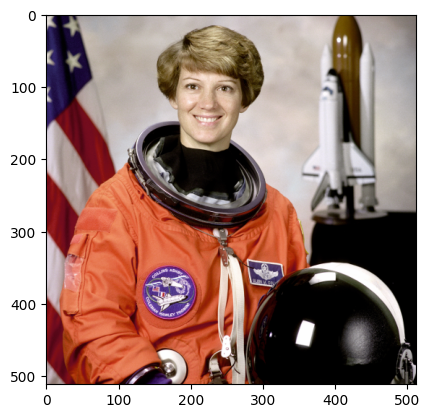

In [4]:
img = data.astronaut()
plt.imshow(img)
print(img.shape)

# Questão 1
<p>Realizar as seguintes transformações geoméricas:
  <ul>
  <li>Rotaçao de 23 graus. A imagem resultante deve incluir a imagem completa</li>
  <li>Reescalar a imagem para a metade</li>
  <li>Trasladar em 50 pixels en linhas e 100 pixels em colunas. Usar a combinação das funções <i>AffineTransform</i> e <i>warp</i></li>
  <li>Aplicar o efeito de cisalhamento (shear) em $\frac{\pi}{4}$ graus</li>
  </ul>
</p>

In [7]:
rotacao = transform.rotate(img, 23, resize = True)
escala = transform.rescale(img, 0.5, 2, channel_axis=2)
matriz_traslacao = transform.AffineTransform(translation=(100, 50))
traslacao = transform.warp(img, inverse_map=matriz_traslacao)
matriz_shear = transform.AffineTransform(shear=np.pi / 4)
shear = transform.warp(img, inverse_map=matriz_shear)


Text(0.5, 1.0, 'Shear')

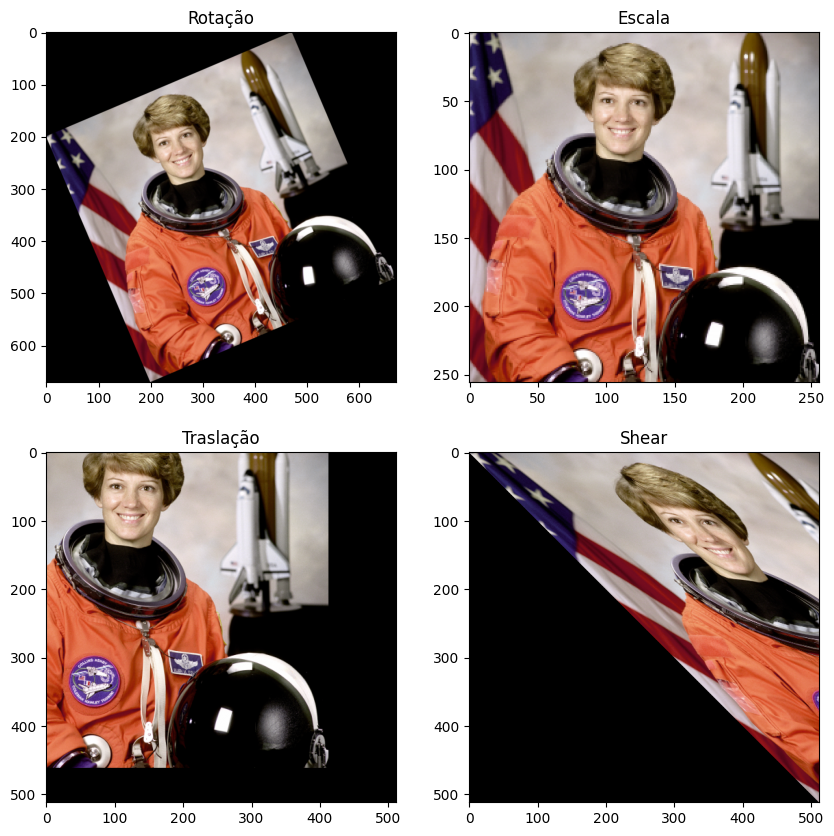

In [8]:
f, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(rotacao)
ax[0,0].set_title('Rotação')
ax[0,1].imshow(escala)
ax[0,1].set_title('Escala')
ax[1,0].imshow(traslacao)
ax[1,0].set_title('Traslação')
ax[1,1].imshow(shear)
ax[1,1].set_title('Shear')

# Questão 2

Dadas duas imagens, misturar ambas imagens gerando uma terceira. A forma de misturar é a seguinte: a terceira imagem estará formada pelas linhas impares da primeira imagem e as pares da segunda imagem.

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://drive.google.com/uc?id=1FboaUm6DeM-HsHRXQfyt1tPgl6rLkGQK" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>





In [ ]:
def merge(img1, img2):

  return nimg


In [ ]:
lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_')
clown = io.imread('https://drive.google.com/uc?id=15yt6Tt5liol_jKWbkfcNXV-SoeaY706s')

print(f'Tamanho imagem Lenna: {lenna.shape}')
print(f'Tamanho imagem clown: {clown.shape}')

new_clown = util.img_as_ubyte(color.rgba2rgb(clown))
merged = merge(lenna, new_clown)

Tamanho imagem Lenna: (512, 512, 3)
Tamanho imagem clown: (512, 512, 4)


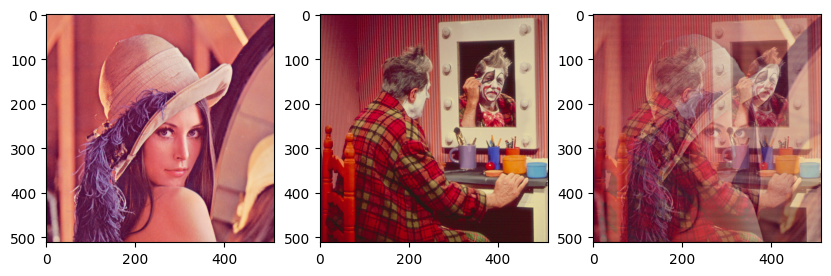

In [ ]:
f, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(lenna)
ax[1].imshow(clown)
ax[2].imshow(merged)

# Questão 3

<p> Na seguinte imagem o valor das intensidades dos niveis de cinza estão concentrados na escala intermediaria. Verique isso calculando o histograma da imagem. Logo, corrija esse problema a través do algoritmo <i>contrast-stretching()</i>. </p>


<center>
<img src="https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb" alt="Drawing" style="width: 250px;"/>
</center>


<p>
Realizar os seguinte passos:
<ol>
<li> Calcular o histograma da imagem</li>
<li> Implementar a função <i>constrast-stretching</i>.  Ela é definida da seguinte forma: $$s = T(r) = \frac{1}{1 + (m/r)^E}$$ onde $r$ denota a intensidade da imagem, $m$ é um valor dentro do intervalo [0,1] e $E$ um valor positivo. A intensidade $r$ da imagem deve estar normalizada entre [0,1]</li>
</ol>

<center>
<img src="https://drive.google.com/uc?id=1hPgC1WDTmuU8A2E6AeEXPmanf_vW81_a" alt="Drawing" width="230" />
</center>


</p>

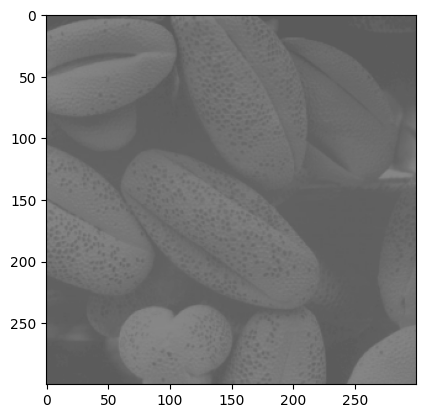

In [ ]:
img2 = io.imread("https://drive.google.com/uc?id=1Tils6Uo-h2fh3JoTcsaMexoKR1AaMXqb")
plt.imshow(img2, cmap='gray', vmin =0, vmax=255)

### Calcular o histograma

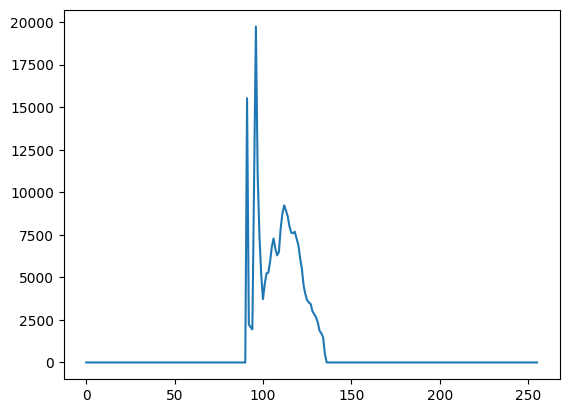

In [ ]:
def constrast_streaching(img, m=0.5, E=2):

    return nimg

### Aplicar a função contrast_streaching e recalcular o histograma

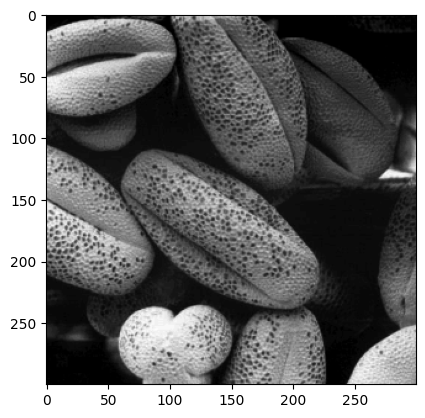

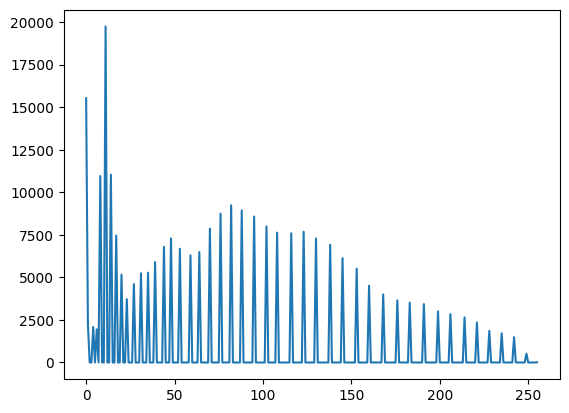

In [ ]:
nimg = mapping(constrast_streaching(img2, m=0.5, E=9))
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

h2 = ndimage.histogram(nimg, min=0, max=1, bins=256)
plt.figure()
plt.plot(h2)

### Realizar o mesmo processo com as duas seguintes imagens

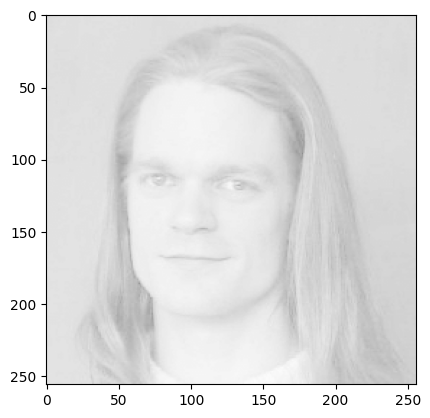

In [ ]:
nimg10 = io.imread('https://drive.google.com/uc?id=15tblJ6rU1GvCcTT60eN8jxOV81km2Okr')
plt.imshow(nimg10)

#### Calcular o histograma

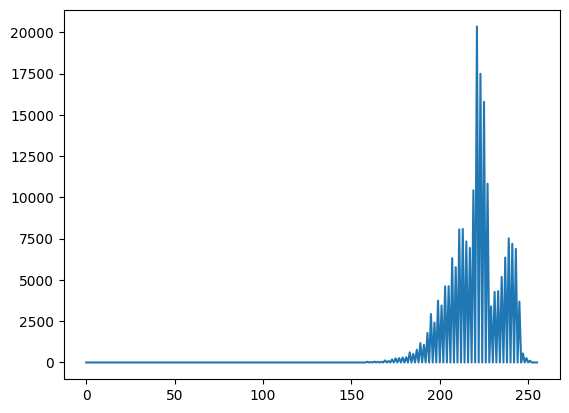

In [ ]:
h =
plt.plot(h)

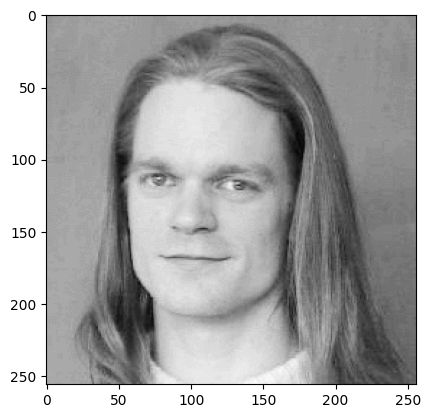

In [ ]:
nimg =
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

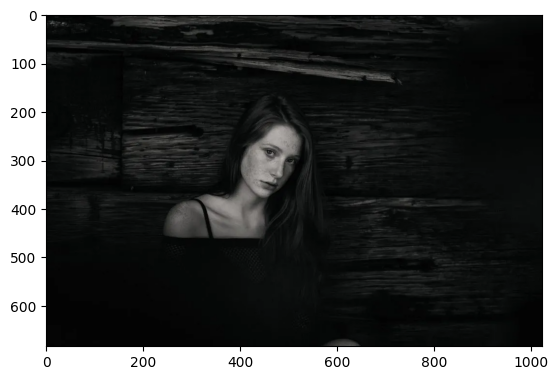

In [ ]:
nimg10 = io.imread('https://drive.google.com/uc?id=1-th5aYMyQUYmAXtVjUGdohzOJlhx2Oy-')
plt.imshow(nimg10)

#### Calcular o histograma

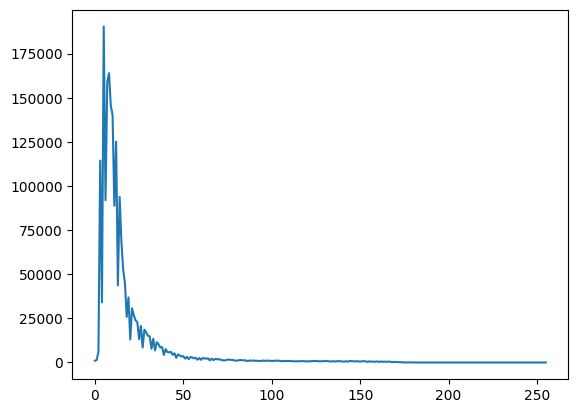

In [ ]:
h =
plt.plot(h)

<ipython-input-13-ad6819d465a1>:3: RuntimeWarning: divide by zero encountered in divide
  nimg = 1 / (1 + (m/img)**E)


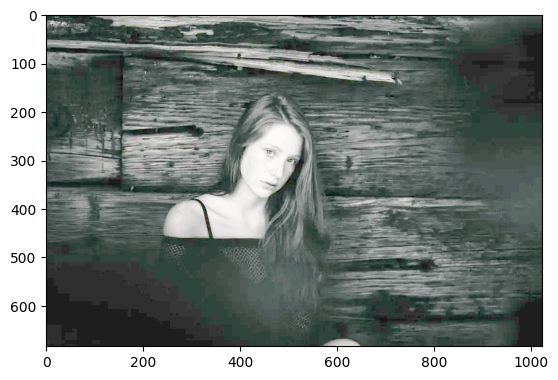

In [ ]:
nimg =
plt.imshow(nimg, cmap='gray', vmin=0, vmax=1)

# Questão 4

A tranformação Wave é definida como:
    \begin{eqnarray}
    nx(x,y) &=& x + 20 sin (2*\pi * y / 150) \nonumber  \\
    ny(x,y) &=& y \nonumber
    \end{eqnarray}
onde $x$ e $y$ representam as coordenadas atuais da imagem, e $nx$ e $ny$ são as novas coordenas depois da transformação.

O efeito gerado com a função é o seguinte:
<center>
<img src="https://drive.google.com/uc?id=1xXN1wY_Zdj6w8BIkF2PIU1Z99RI5OwDf" alt="Drawing" width="230" />
</center>


In [ ]:
def wave(xy):
    xy[:, 1] += 20*np.sin(2*np.pi*xy[:, 0]/150)
    return xy

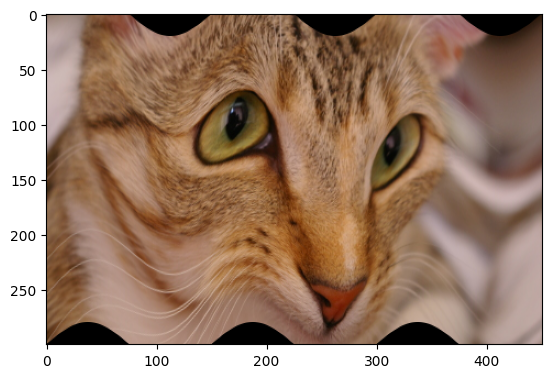

In [ ]:
im = data.chelsea()
nimg = transform.warp(im, wave)
plt.imshow(nimg)

### Modifique o código para gerar o seguinte efeito:

<center>
<img src="https://drive.google.com/uc?id=1peV9ks80_w3mI5fDjD6h7uPqEINzxA0a" alt="Drawing" width="300" />
</center>

In [ ]:
def wave2(xy):

    return xy

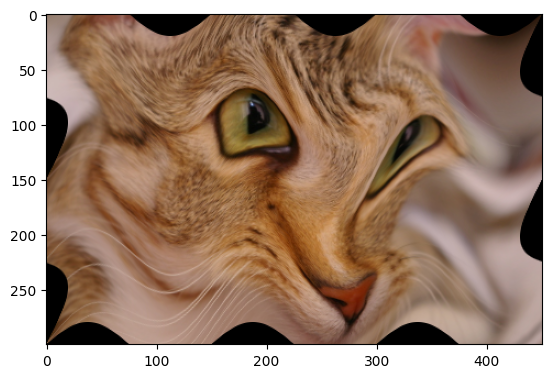

In [ ]:
nimg = transform.warp(im, wave2)
plt.imshow(nimg)

# Questão 4

<p>Calcular e exibir o histograma de uma imagem em tons de cinza (8 bits por pixel). Caso a
imagem informada como entrada seja colorida, converta-a para tons de cinza (luminância) e
então calcule seu histograma. Exiba o histograma em uma janela de $256 \times 256$ pixels, onde cada
coluna da imagem representa um tom de cinza. Normalize a altura das colunas para obter uma
representação apropriada.</p>

In [ ]:
def hist_img(img):


  return nimg

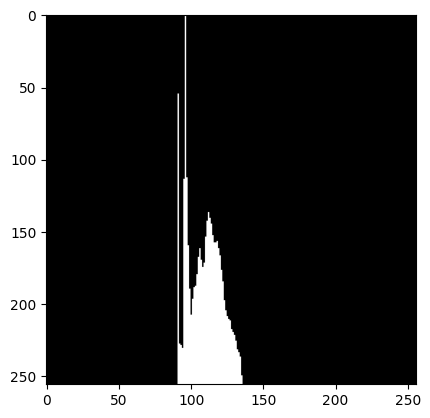

In [ ]:
plt.imshow(hist_img(img2), cmap='gray')

# Questão 5
<p>Implemente uma função que realize a rotação de uma imagem facial juntamente com seus respectivos landmarks. A imagem está associada a um conjunto de coordenadas que representam pontos-chave das principais partes da face. A rotação deve ser aplicada de forma consistente tanto à imagem quanto aos landmarks, preservando sua correspondência espacial.</p>

#### Função para plotar os landmarks na imagem

In [ ]:
def insertLandmark_in_2D_image(img, landmarks, value = 255, viz = 1):
    lin, col = img.shape[:2]
    for i in range( len(landmarks) ):
        iniR = landmarks[i,0] - viz
        endR = landmarks[i,0] + viz
        iniC = landmarks[i,1] - viz
        endC = landmarks[i,1] + viz
        if iniR >= 0 and endR < lin and iniC >= 0 and endC < col:
            img[ iniR:endR, iniC:endC ] = value
    return img

def insertLandmark_in_3D_image(img, landmarks, channel = 0, viz = 1):
    nimg = img.copy()
    value = 1 if np.max(img) <= 1 else 255
    lin, col = nimg.shape[:2]

    if channel == 0:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, value, viz)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, 0, viz)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, 0, viz)
    elif channel == 1:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, 0, viz)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, value, viz)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, 0, viz)
    elif channel == 2:
        nimg[:,:,0] = insertLandmark_in_2D_image(nimg[:,:,0], landmarks, 0, viz)
        nimg[:,:,1] = insertLandmark_in_2D_image(nimg[:,:,1], landmarks, 0, viz)
        nimg[:,:,2] = insertLandmark_in_2D_image(nimg[:,:,2], landmarks, value, viz)
    return nimg

### Carrega a imagem e seus respectivos landmarks

In [ ]:
img = io.imread('https://drive.google.com/uc?id=15iM3Ds3oDwZ7w4iRggx5tbEM_HVayobR')

file_id = "1YFj703yFOwIIH5jnRU1Ix7FNu2NxKHc_" # replace with your ID
!gdown https://drive.google.com/uc?id={file_id}
landmarks = np.loadtxt('indoor_006.txt', delimiter=';').astype(np.float64)


Downloading...
From: https://drive.google.com/uc?id=1YFj703yFOwIIH5jnRU1Ix7FNu2NxKHc_
To: /content/indoor_006.txt
100% 1.15k/1.15k [00:00<00:00, 3.11MB/s]


### Plotando a imagem junto com os landmarks

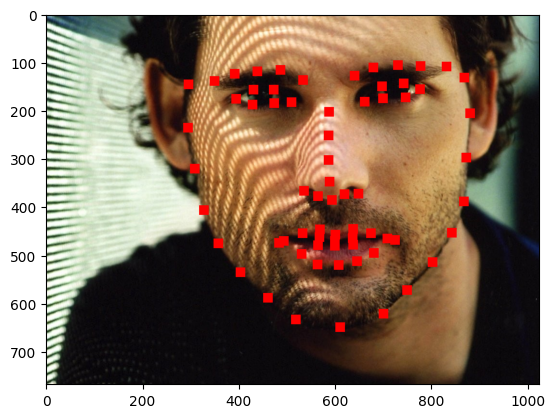

In [ ]:
plt.imshow(insertLandmark_in_3D_image(img, landmarks[:,-1::-1].astype(np.int64), channel = 0, viz = 10))

In [ ]:
def rotation_matrix(theta, rows, cols):

      return mat

In [ ]:
def rotacao(img, landmarks, angulo):


  return nimage, n_landmarks[:2].T

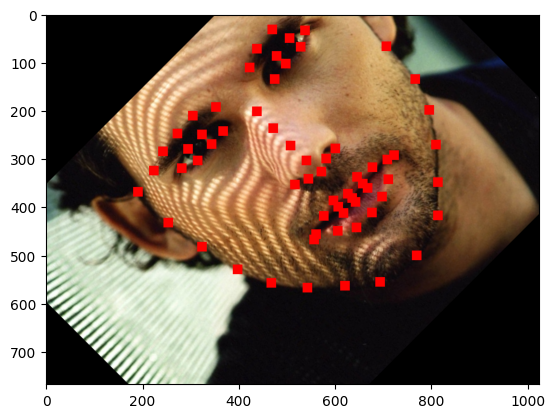

In [ ]:
nimg, nlandmark = rotacao(img, landmarks, 45)
plt.imshow(insertLandmark_in_3D_image(nimg, nlandmark.astype(np.int64), channel = 0, viz = 10))